In [95]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [78]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.1 MB 1.1 MB/s 


Задание 1

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train_weather.csv to train_weather.csv


In [131]:
df = pd.read_csv("train_weather.csv")
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Brisbane,13.7,23.6,0.0,5.0,9.6,SSE,24.0,SSW,ESE,7.0,9.0,65.0,53.0,1028.4,1026.7,1.0,1.0,18.3,22.3,0,0
1,Sydney,15.4,21.2,61.2,5.8,2.7,S,43.0,WSW,SSW,19.0,24.0,91.0,65.0,1018.8,1016.5,8.0,7.0,15.6,20.7,1,1
2,Richmond,16.8,30.9,1.0,NaN,NaN,NE,35.0,NNW,NE,7.0,26.0,80.0,38.0,1020.4,1013.2,1.0,NaN,19.6,30.0,0,0
3,NorfolkIsland,13.9,17.1,0.2,3.8,8.9,SE,37.0,SE,SSE,17.0,20.0,56.0,63.0,1027.7,1026.1,3.0,1.0,15.3,15.8,0,0
4,Mildura,16.0,36.1,0.0,6.8,12.9,ENE,33.0,ENE,E,17.0,19.0,58.0,32.0,1018.5,1016.0,0.0,3.0,26.0,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121868,GoldCoast,17.6,25.1,0.0,NaN,NaN,SSE,56.0,SE,E,9.0,19.0,58.0,58.0,1012.8,1010.2,NaN,NaN,23.5,24.2,0,0
121869,Adelaide,15.1,25.2,0.0,10.0,11.3,SW,48.0,S,WSW,11.0,28.0,55.0,41.0,1018.8,1018.3,NaN,NaN,19.0,24.6,0,0
121870,MountGinini,10.5,18.4,1.2,NaN,NaN,SSE,50.0,E,E,15.0,13.0,97.0,93.0,NaN,NaN,NaN,NaN,12.5,15.9,1,1
121871,Adelaide,13.6,19.8,2.6,NaN,7.5,WSW,54.0,WSW,WSW,11.0,20.0,76.0,46.0,1008.5,1007.4,NaN,NaN,14.4,18.9,1,1


In [9]:
from google.colab import files
uploaded = files.upload()

Saving test_weather.csv to test_weather (1).csv


In [132]:
dfr = pd.read_csv("test_weather (1).csv")
dfr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,PearceRAAF,11.0,22.1,0.0,NaN,8.2,ESE,57.0,E,E,30.0,22.0,52.0,34.0,1028.5,1024.6,3.0,NaN,14.7,20.7,0
1,Albury,5.6,20.7,0.0,NaN,NaN,ESE,44.0,SE,NNE,7.0,24.0,65.0,42.0,1023.0,1018.1,NaN,NaN,13.9,20.3,0
2,Cobar,9.5,18.4,0.0,1.6,NaN,SW,26.0,WNW,SSW,2.0,15.0,67.0,43.0,1024.7,1021.5,7.0,7.0,11.5,17.9,0
3,Albany,18.4,22.0,0.0,3.8,0.2,NaN,NaN,E,ESE,22.0,19.0,80.0,79.0,1019.5,1017.0,8.0,8.0,20.7,21.4,0
4,MountGambier,10.4,20.7,0.4,3.8,9.0,SSW,43.0,WSW,SW,15.0,26.0,55.0,38.0,1019.5,1022.4,5.0,4.0,15.7,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,BadgerysCreek,13.1,26.7,0.2,NaN,NaN,W,52.0,N,WNW,13.0,28.0,58.0,35.0,1005.4,1003.9,NaN,NaN,19.4,26.0,0
13537,Richmond,16.4,30.1,0.0,5.6,NaN,WSW,43.0,ENE,WSW,2.0,20.0,79.0,38.0,1003.2,1000.8,NaN,NaN,21.6,29.7,0
13538,Uluru,22.9,32.9,0.0,NaN,NaN,E,52.0,E,ESE,28.0,20.0,23.0,17.0,1018.4,1015.0,NaN,1.0,25.2,31.4,0
13539,Nhil,12.5,34.2,0.0,NaN,NaN,SSE,31.0,E,ESE,15.0,13.0,37.0,13.0,1021.8,1018.7,NaN,NaN,21.1,31.3,0


In [20]:
df.isna().sum() # в каких стольбцах и сколько пропущенных значений

Location             0
MinTemp           1221
MaxTemp           1031
Rainfall          2728
Evaporation      50544
Sunshine         56175
WindGustDir       8716
WindGustSpeed     8661
WindDir9am        8914
WindDir3pm        3354
WindSpeed9am      1519
WindSpeed3pm      2345
Humidity9am       2231
Humidity3pm       3382
Pressure9am      12635
Pressure3pm      12602
Cloud9am         46059
Cloud3pm         48476
Temp9am           1533
Temp3pm           2656
RainToday            0
RainTomorrow         0
dtype: int64

In [21]:
df.dtypes # какие типы данных в столбцах

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [133]:
df=df.fillna(df.mean()) #замена на средние
dfr=dfr.fillna(df.mean()) #замена на средние
df.isna().sum() # в каких стольбцах и сколько пропущенных значений

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      8716
WindGustSpeed       0
WindDir9am       8914
WindDir3pm       3354
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [82]:
df.dtypes # какие типы данных в столбцах

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [134]:
df=df.drop(columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location'], axis = 1)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.7,23.6,0.0,5.000000,9.600000,24.0,7.0,9.0,65.0,53.0,1028.400000,1026.700000,1.000000,1.000000,18.3,22.3,0,0
1,15.4,21.2,61.2,5.800000,2.700000,43.0,19.0,24.0,91.0,65.0,1018.800000,1016.500000,8.000000,7.000000,15.6,20.7,1,1
2,16.8,30.9,1.0,5.400952,7.592793,35.0,7.0,26.0,80.0,38.0,1020.400000,1013.200000,1.000000,4.492486,19.6,30.0,0,0
3,13.9,17.1,0.2,3.800000,8.900000,37.0,17.0,20.0,56.0,63.0,1027.700000,1026.100000,3.000000,1.000000,15.3,15.8,0,0
4,16.0,36.1,0.0,6.800000,12.900000,33.0,17.0,19.0,58.0,32.0,1018.500000,1016.000000,0.000000,3.000000,26.0,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121868,17.6,25.1,0.0,5.400952,7.592793,56.0,9.0,19.0,58.0,58.0,1012.800000,1010.200000,4.408355,4.492486,23.5,24.2,0,0
121869,15.1,25.2,0.0,10.000000,11.300000,48.0,11.0,28.0,55.0,41.0,1018.800000,1018.300000,4.408355,4.492486,19.0,24.6,0,0
121870,10.5,18.4,1.2,5.400952,7.592793,50.0,15.0,13.0,97.0,93.0,1017.671683,1015.276048,4.408355,4.492486,12.5,15.9,1,1
121871,13.6,19.8,2.6,5.400952,7.500000,54.0,11.0,20.0,76.0,46.0,1008.500000,1007.400000,4.408355,4.492486,14.4,18.9,1,1


In [135]:
dfr=dfr.drop(columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location'], axis = 1)
dfr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,11.0,22.1,0.0,5.400952,8.200000,57.000000,30.0,22.0,52.0,34.0,1028.5,1024.6,3.000000,4.492486,14.7,20.7,0
1,5.6,20.7,0.0,5.400952,7.592793,44.000000,7.0,24.0,65.0,42.0,1023.0,1018.1,4.408355,4.492486,13.9,20.3,0
2,9.5,18.4,0.0,1.600000,7.592793,26.000000,2.0,15.0,67.0,43.0,1024.7,1021.5,7.000000,7.000000,11.5,17.9,0
3,18.4,22.0,0.0,3.800000,0.200000,40.154922,22.0,19.0,80.0,79.0,1019.5,1017.0,8.000000,8.000000,20.7,21.4,0
4,10.4,20.7,0.4,3.800000,9.000000,43.000000,15.0,26.0,55.0,38.0,1019.5,1022.4,5.000000,4.000000,15.7,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,13.1,26.7,0.2,5.400952,7.592793,52.000000,13.0,28.0,58.0,35.0,1005.4,1003.9,4.408355,4.492486,19.4,26.0,0
13537,16.4,30.1,0.0,5.600000,7.592793,43.000000,2.0,20.0,79.0,38.0,1003.2,1000.8,4.408355,4.492486,21.6,29.7,0
13538,22.9,32.9,0.0,5.400952,7.592793,52.000000,28.0,20.0,23.0,17.0,1018.4,1015.0,4.408355,1.000000,25.2,31.4,0
13539,12.5,34.2,0.0,5.400952,7.592793,31.000000,15.0,13.0,37.0,13.0,1021.8,1018.7,4.408355,4.492486,21.1,31.3,0


In [136]:
y = df['RainTomorrow'] 
x = df.drop(['RainTomorrow'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)	#Делим данные на тестовые и тренировочные

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)	#Делим данные на тестовые и тренировочные
logistic_regr = LogisticRegression()	#Создаём модель логистической регресии
logistic_regr.fit(X_train, y_train)	#Заполняем её данными
y_pred = logistic_regr.predict(X_test)	#Возвращает вектор ответов для X_test
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  0.8377003446200973
Recall:  0.45132962275819416
Precision:  0.7089566737905576


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [137]:
knn_regr = KNeighborsClassifier()
knn_regr.fit(X_train, y_train)	#Заполняем её данными
knn_pred = knn_regr.predict(X_test)	#Возвращает вектор ответов для X_test
print("Accuracy: ", accuracy_score(y_test, knn_pred))

Accuracy:  0.8328319019747279


In [86]:
cat = CatBoostClassifier()  #Коты вперёд
cat.fit(X_train, y_train)	#Заполняем данными
cat_pred = cat.predict(X_test)	#Возвращает вектор ответов для X_test
print("Accuracy: ", accuracy_score(y_test, cat_pred))

Learning rate set to 0.068782
0:	learn: 0.6427675	total: 74.5ms	remaining: 1m 14s
1:	learn: 0.6033894	total: 95.6ms	remaining: 47.7s
2:	learn: 0.5690870	total: 118ms	remaining: 39.3s
3:	learn: 0.5398736	total: 142ms	remaining: 35.3s
4:	learn: 0.5158217	total: 165ms	remaining: 32.8s
5:	learn: 0.4939339	total: 188ms	remaining: 31.2s
6:	learn: 0.4775014	total: 215ms	remaining: 30.4s
7:	learn: 0.4625317	total: 237ms	remaining: 29.4s
8:	learn: 0.4495463	total: 261ms	remaining: 28.8s
9:	learn: 0.4388872	total: 284ms	remaining: 28.1s
10:	learn: 0.4297532	total: 307ms	remaining: 27.6s
11:	learn: 0.4215807	total: 330ms	remaining: 27.2s
12:	learn: 0.4147416	total: 353ms	remaining: 26.8s
13:	learn: 0.4074537	total: 381ms	remaining: 26.8s
14:	learn: 0.4024910	total: 406ms	remaining: 26.6s
15:	learn: 0.3976116	total: 443ms	remaining: 27.3s
16:	learn: 0.3933467	total: 466ms	remaining: 26.9s
17:	learn: 0.3895940	total: 489ms	remaining: 26.7s
18:	learn: 0.3861446	total: 511ms	remaining: 26.4s
19:	lear

In [34]:
y_pred = logistic_regr.predict(dfr)

In [87]:
cat_pred = cat.predict(dfr)

In [138]:
knn_pred = knn_regr.predict(dfr)

In [40]:
res = pd.DataFrame({'index': [i for i in range(len(y_pred))],'RainTomorrow': y_pred})

In [88]:
res = pd.DataFrame({'index': [i for i in range(len(cat_pred))],'RainTomorrow': cat_pred})

In [139]:
res = pd.DataFrame({'index': [i for i in range(len(knn_pred))],'RainTomorrow': knn_pred})

In [140]:
res.to_csv('Goncharenko_classwork.csv', index=False)
files.download("Goncharenko_classwork.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Итог: Catboost показал лучший результат поэтому он и пошёл в зачёт (коты почти всегда выручают)

ЗАДАНИЕ 2

In [42]:
from google.colab import files
uploaded = files.upload()

Saving train_simple_reg.csv to train_simple_reg.csv


In [148]:
df = pd.read_csv("train_simple_reg.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,Predict
0,0,-0.019734,-2.293412,-1.990040,2.077776,0.517476,-0.414082,2.983293,0.355151,3.691985,-3.158359,5.778825
1,1,0.807845,-0.755991,0.666609,-0.631528,1.335432,0.475088,-0.693739,-0.726469,-0.601803,0.123827,-3.011382
2,3,1.490152,3.544350,0.126952,-2.002267,0.526118,-0.357506,-3.680189,-1.032858,-1.293841,1.994930,-13.235602
3,4,-1.309911,-2.506019,1.253174,3.283466,-0.936802,0.650320,0.208176,-1.446294,0.828209,2.080548,0.236855
4,5,0.786761,0.881352,-0.340254,-1.394215,0.717803,-0.134697,-0.408692,0.279844,-0.411956,-0.681040,-5.260961
...,...,...,...,...,...,...,...,...,...,...,...,...
895,995,3.130305,1.569587,-0.196364,-1.079102,0.461223,2.725660,-1.339184,0.996833,-0.970232,-0.965126,-4.905278
896,996,0.882832,-1.408377,2.570194,0.486270,0.818461,2.046682,-2.299856,-1.796541,-2.010109,2.765260,-4.246608
897,997,-1.524617,-0.920628,0.699234,0.326355,0.562563,-1.797492,-0.530307,-1.772910,0.219859,1.655470,-4.587023
898,998,-4.056466,-1.586197,3.461764,-0.100583,-1.661877,-1.045096,-0.063807,-0.631540,-3.785526,4.114990,-7.648747


In [46]:
from google.colab import files
uploaded = files.upload()

Saving test_simple_reg.csv to test_simple_reg.csv


In [149]:
dfr = pd.read_csv("test_simple_reg.csv")
dfr

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,417,1.866652,0.786687,-3.434189,1.673743,-0.577979,0.801353,2.194852,1.856527,4.006230,-4.090338
1,376,3.902346,1.178681,-3.435479,2.536991,-0.438978,2.840067,0.923085,1.557193,4.346274,-3.874591
2,261,-0.068994,1.925591,-1.872763,0.484287,-0.579073,-1.517505,-0.167924,-0.069478,2.154248,-0.444245
3,534,1.142070,5.191695,-1.090300,-0.910057,-2.967694,1.219751,-1.498791,2.417258,-1.206532,0.440608
4,477,-1.399843,-2.169002,2.399824,0.423625,0.783723,-0.441595,-1.123555,-2.212074,-1.438780,2.885658
...,...,...,...,...,...,...,...,...,...,...,...
95,258,-2.238395,-1.491452,0.832618,2.245486,-1.476456,-0.531474,0.745987,-0.646783,0.409402,1.737479
96,787,-0.765786,2.673241,3.122303,-2.560241,-1.097674,0.350868,-3.753000,-0.504308,-5.334925,4.775312
97,481,-0.584155,-2.840852,0.627637,1.604820,1.162048,-0.350233,0.407602,-1.779897,1.225473,0.475067
98,894,1.361194,1.072570,-2.061691,0.966721,-1.317664,1.476960,1.647240,2.274890,1.747781,-2.758610


In [48]:
df.isna().sum() # в каких стольбцах и сколько пропущенных значений

Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
Predict       0
dtype: int64

In [49]:
df.dtypes # какие типы данных в столбцах

Unnamed: 0      int64
0             float64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
9             float64
Predict       float64
dtype: object

In [193]:
y = df['Predict'] 
x = df.drop(['Predict'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)	#Делим данные на тестовые и тренировочные

In [194]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)	#Делим данные на тестовые и тренировочные
lin = LinearRegression()	#Создаём модель линейной регресии
lin.fit(X_train, y_train)	#Заполняем её данными
res = lin.score(x, y)
print('coefficient of determination:', res)
y_pred = lin.predict(X_test)	#Возвращает вектор ответов для X_test
y_pred

coefficient of determination: 1.0


array([ -4.85789931,  -6.61207843, -11.57135594,  -4.32516221,
        -3.6150738 ,  -7.74336131,  -3.11014526,  -5.24989677,
        -5.03872659,  -5.8952259 ,  -0.6097975 ,  -2.78593262,
        -5.76279064,   0.34935531,  -6.74056592, -10.59837641,
        -2.60689281,  -3.14855369,   1.93444869, -16.17411495,
         1.21159916,  -5.40194549, -10.19870678,  -6.19150748,
         4.1298544 ,  -0.39434643,  -7.13616645, -10.20528916,
        -7.58275228,  -4.72431277,  -1.12239024,  -0.46232148,
        -7.92913912,  -3.46665695,  -0.67954882,  -3.24776125,
        -5.20964648,  -3.58082925,  -1.93124152,  -6.52491203,
        -1.43571784,  -7.15434093, -17.601523  , -11.78135263,
       -12.19947807,  -3.62452655,  -9.95225202,  -6.6918648 ,
         5.7788251 ,  -2.87411438, -10.77014011,  -7.40452232,
        -8.99785958,   9.149595  ,  -5.58107151,  -6.09763719,
        -7.18790306,  -6.96478005,  -5.54964801,  -1.76363215,
        -3.30188533,  -2.27861362,  -4.98557427, -13.23

In [161]:
y_pred = lin.predict(dfr)
y_pred

array([  2.3681824 ,   2.90174376,  -5.79901408, -12.77574291,
        -4.00885638,  -4.44175745,  -1.57903697,  -3.64333624,
        -7.04551887,  -8.19866467,   2.66906506,  -5.11617315,
        -0.1451319 ,   3.17934795,  -5.57420855,  -8.99271045,
        -7.60808719,  -0.52670723,  -1.68518524,  -4.59470589,
        -2.84443814, -12.74993315, -11.01672323,  -1.71730718,
       -18.029801  ,  -8.09754657,  -5.60689592,  -7.68025535,
         1.92589941,   3.56392995,  -4.68484375,  -9.55242738,
        -3.24402662,  -0.08149652,  -2.92646086,   0.84057806,
        -7.41767579,  -7.85660981,  -6.78842583,  -0.53521717,
         0.07102973,  -6.4229036 ,  -3.3873022 ,  -3.98200828,
       -10.62680653,  -7.31027196,  -0.78460229,   8.74232168,
        -2.4349823 ,   0.69942642, -11.03667348,   5.92761289,
        -3.1458432 ,   1.92941608,  -1.59383917,  -9.69314793,
       -13.18479383,  -2.50722521,  -1.29725203,  -6.50414515,
        -0.74430082,  -2.17811026,  -2.87926424,  -0.34

In [153]:
res = pd.DataFrame({'index': [i for i in range(len(y_pred))],'Predict': y_pred})

In [154]:
res

,index,Predict
0,0,2.368182
1,1,2.901744
2,2,-5.799014
3,3,-12.775743
4,4,-4.008856
...,...,...
95,95,-2.147276
96,96,-16.446017
97,97,1.402293
98,98,-0.496550


In [75]:
res.to_csv('Goncharenko_classwork_regr.csv', index=False)
files.download("Goncharenko_classwork_regr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
# услиенно пытаюсь отобразить график регрессии

In [200]:
x = df[['Predict']].values
y = df['Predict'].values

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


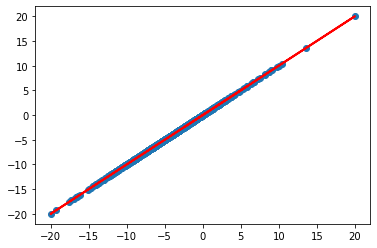

In [201]:
plt.scatter(x, y)
plt.plot(x, lin.predict(X), color='red', linewidth=2)